In [76]:
from IPython.display import HTML
import kyle_tools.heplerFunctionBitFlip as heplerFunctionBitFlip
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import SimRunner as sr
import os, importlib

heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)
%matplotlib inline
%load_ext jupyternotify
plt.rcParams["animation.html"] = "jshtml"

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [79]:
#setting up parameters
# try to create a ParamGuider class from source.kyle_tools.multisim OR make your own similar class in order to 
# 'optimize' this bit flip. By optimize, I mean to find a protocol that has low work but also high fidelity.  
# Keep lambda at .5 but feel free to change the other parameters.
bfr = sr.BitFlipRunner()

p_vals={}
p_vals['lambda']=0
p_vals['N'] = 10_000
p_vals['dt'] = 1/1000
p_vals['k'] = np.pi**2
p_vals['tau'] = 1
p_vals['depth'] = 1
p_vals['location'] = 1
p_vals["noise"] = False
p_vals["shifted"] = 0

bfr.change_params(p_vals) # this is a method in SimManager, defined in multisim
bfr.run_sim() # defined in kyle_tools/multism.py


 initializing...
 found 10022 samples out of 10000
The as_tep is 2
The dt is 0.001
This line is for the initializatoin of the simulation object.
<bound method RKDetermEulerStoch.update_state of <integrators.rkdeterm_eulerstoch.RKDetermEulerStoch object at 0x7ff51de6e040>> [<infoenginessims.simprocedures.basic_simprocedures.ReturnFinalState object at 0x7ff561c15340>, <infoenginessims.simprocedures.basic_simprocedures.TerminateOnMean object at 0x7ff597f23b20>, <infoenginessims.simprocedures.basic_simprocedures.MeasureAllState object at 0x7ff51de6eca0>, <infoenginessims.simprocedures.trajectory_measurements.CountJumps object at 0x7ff51de687f0>] 1000 0.001

 running sim...
901 1000
902 1000
903 1000
904 1000
905 1000
906 1000
907 1000
908 1000
909 1000
910 1000
911 1000
912 1000
913 1000
914 1000
915 1000
916 1000
917 1000
918 1000
919 1000
920 1000
921 1000
922 1000
923 1000
924 1000
925 1000
926 1000
927 1000
928 1000
929 1000
930 1000
931 1000
932 1000
933 1000
934 1000
935 1000
936 10

In [80]:
get_force = bfr.eq_system.get_external_force
initial_state = bfr.sim.initial_state
F = get_force(initial_state, 0)
state = initial_state[...,0] 
np.mean(np.multiply(state, -F))


0.9569136248014576

In [85]:
def check_state_EPT(_state):
    get_force = bfr.eq_system.get_external_force
    X = np.append(_state[...,0], bfr.system.mass * _state[...,1], axis=1)
    d_H = np.append( -get_force(_state, 0), _state[...,1], axis=1)
    prod = np.einsum('in,im->inm', X, d_H)
    prod_00 = np.mean(prod[:, 0, 0])
    prod_01 = np.mean(prod[:, 0, 1])
    prod_10 = np.mean(prod[:, 1, 0])
    prod_11 = np.mean(prod[:, 1, 1])
    print("The corresponding mean of the EPT matrix is: ")
    print("# diagonal Terms")
    print(f"prod_00 = {prod_00}, prod_11 = {prod_11}")

    print("# non-diagonal Terms")
    print(f"prod_01 = {prod_01}, prod_10 = {prod_10}")
    

initial_state = bfr.sim.initial_state
final_state = bfr.sim.output.final_state

check_state_EPT(initial_state)
print()
check_state_EPT(final_state)

The corresponding mean of the EPT matrix is: 
# diagonal Terms
prod_00 = 0.9569136248014576, prod_11 = 0.9999651687510399
# non-diagonal Terms
prod_01 = -0.005665039676669297, prod_10 = -0.0412373824922579

The corresponding mean of the EPT matrix is: 
# diagonal Terms
prod_00 = 0.9569136248015587, prod_11 = 0.9999651687509359
# non-diagonal Terms
prod_01 = -0.005665039670857644, prod_10 = -0.0412373824893501


In [65]:
prob = np.exp(-E)/np.sum(np.exp(-E))

In [71]:
operator = np.multiply(state, -F).reshape(5000)

In [70]:
prob.shape
operator.reshape(5000)
np.sum(prob * operator)

array([-0.18941533, -0.85014091, -0.70024846, ...,  2.29727473,
       -0.55058281, -0.75916629])

0.46688516050779627

In [39]:
np.sum(np.exp(-E))

6738.1094357434895

In [29]:
np.multiply(state, -F)

array([[ 9.37772681],
       [ 6.84514493],
       [ 2.23301923],
       ...,
       [13.89561319],
       [ 1.62658063],
       [ 7.35654705]])

In [5]:
saveLocation = "bitFlipSimData"
json_file_name = "bitFlip_no_noise_no_damping.json"
txt_file_name = "bitFlip_no_noise_no_damping.txt"
jsonPath = os.path.join(saveLocation, json_file_name)
txtPath = os.path.join(saveLocation, txt_file_name)

# single sim

The solution of a simple harmonic oscillator is 
$$x(t) = x_0 cos(\omega t) + \frac{v_0}{\omega} sin(\omega t)$$
$$v(t) = - x_0 \omega sin(\omega t) + v_0 cos(\omega t)$$
$$\omega = \sqrt{k}$$



## conclusion:
- We find that the max errors in the position and velocity are about 1e-14 with dt = 1/10_000

In [161]:
sweepObject = {
    "lambda":   0,
    "N":        1_000,
    "dt":       1/50_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": 1
}

omega = np.sqrt(sweepObject["k"])
t = np.pi / np.sqrt(sweepObject["k"])
bfr.change_params(sweepObject)
bfr.run_sim(verbose=True)



 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10051 samples out of 10000
 running sim...

 analyzing output...


In [162]:
initial_state = bfr.sim.initial_state
final_state = bfr.sim.output.final_state
analytic_final_state = final_state.copy()
analytic_final_state[:, :, 0] = initial_state[:, :, 0] * np.cos(omega * t) + \
                                initial_state[:, :, 1] / omega * np.sin(omega * t)
analytic_final_state[:, :, 1] = - initial_state[:, :, 0] * omega * np.sin(omega * t) + \
                                  initial_state[:, :, 1] * np.cos(omega * t)

In [163]:
analytic_final_state[:, :, 0] - final_state[:, :, 0]

array([[1.21043058e-05],
       [3.54193577e-05],
       [9.55408681e-06],
       ...,
       [2.16108695e-05],
       [1.62756166e-05],
       [2.66002216e-06]])

In [164]:
analytic_final_state[:, :, 1] - final_state[:, :, 1]

array([[-2.07846265e-04],
       [-2.20779522e-04],
       [ 9.69465878e-05],
       ...,
       [-8.91837410e-05],
       [-2.56816461e-04],
       [-2.52234386e-04]])

In [165]:
# the maximum error of the position
print("maximum error in position is:", max(np.abs(analytic_final_state[:, :, 0] - final_state[:, :, 0])))
print("maximum error in velocity is:", max(np.abs(analytic_final_state[:, :, 1] - final_state[:, :, 1])))

maximum error in position is: [8.44140966e-05]
maximum error in velocity is: [0.00036135]


In [167]:
all_state = bfr.sim.output.all_state["states"]

In [168]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)
energy_time_series = heplerFunctionBitFlip.get_energy_time_series(bfr, all_state)
number_of_particles = bfr.sim.ntrials

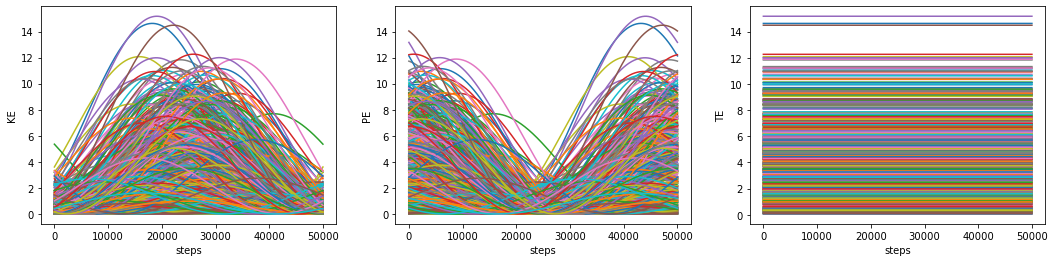

In [171]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)
heplerFunctionBitFlip.plot_energy_time_series(number_of_particles, energy_time_series, 20)



In [174]:
list(p_vals.keys())


dict_keys(['lambda', 'N', 'dt', 'k', 'tau', 'depth', 'location', 'noise'])

In [180]:
np.save(f"bit_flip_np_data_energy_checking/x_position_with_dt_{p_vals['dt']}_(no_dapming_no_noise).npy", \
            np.asarray([initial_state, final_state, list(p_vals.keys()), list(p_vals.values())]))
np.save(f"bit_flip_np_data_energy_checking/energy_time_series_with_dt_{p_vals['dt']}_(no_dapming_no_noise).npy",\
        np.asarray(energy_time_series))

# MultiSim - Time sweep analysis

In [441]:
1/50000

2e-05

In [447]:

exp_list = range(-12, -6, 1)
power_list = np.array([10**x for x in exp_list])
power_list_2 = np.flip(-power_list)
power_list = np.concatenate([power_list, power_list_2])
dt_list = 1.0/50000 + power_list
print(dt_list)

[2.0000001e-05 2.0000010e-05 2.0000100e-05 2.0001000e-05 2.0010000e-05
 2.0100000e-05 1.9900000e-05 1.9990000e-05 1.9999000e-05 1.9999900e-05
 1.9999990e-05 1.9999999e-05]


In [448]:
%%notify
# dt_list = [1/1_000, 1/5_000, 1/10_000, 1/20_000, 1/30_000, 1/40_000, 1/50_000,
#             1/60_000, 1/80_000, 1/90_000, 1/100_000]

# dt_list = [1/x for x in range(49000, 51000, 100)]
dt_list = [1/x for x in range(49990, 50012, 2)]
dt_list = [1/50000 - 1e-16]

exp_list = range(-12, -6, 1)
power_list = np.array([10**x for x in exp_list])
power_list_2 = np.flip(-power_list)
power_list = np.concatenate([power_list, power_list_2])
dt_list = 1.0/50000 + power_list
print(dt_list)

# print(dt_list)

for dt in dt_list:
    sweepObject = {
        "lambda":   0,
        "N":        10_000,
        "dt":       dt,
        "k":        np.pi**2,
        "tau":      1,
        "depth":    1,
        "location": 1
    }
    bfr.change_params(sweepObject)
    bfr.run_sim(verbose=True)
    initial_position = bfr.sim.initial_state
    final_position = bfr.sim.output.final_state
    work_done = bfr.sim.output.final_W
    
    np.save(f"bit_flip_np_data/x_position_with_dt_{dt}_(no_dapming_no_noise).npy", \
            np.asarray([initial_position, final_position]))
    np.save(f"bit_flip_np_data/work_done_with_dt_{dt}_(no_dapming_no_noise).npy",\
            np.asarray(work_done))

[2.0000001e-05 2.0000010e-05 2.0000100e-05 2.0001000e-05 2.0010000e-05
 2.0100000e-05 1.9900000e-05 1.9990000e-05 1.9999000e-05 1.9999900e-05
 1.9999990e-05 1.9999999e-05]

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10006 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10034 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10003 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10143 samples out of 10000
 running sim...

 analyzing output...

 initializing...
the parame

<IPython.core.display.Javascript object>

## (a) precision test
- In the following section, I compare the result of the simulation and the analytic solution to see how large the error in the position will be. 
- I used the time steps for dt = [1/1_000, 1/5_000, 1/10_000, 1/20_000, 1/30_000, 1/40_000, 1/50_000, 1/60_000, 1/80_000, 1/90_000, 1/100_000]
- I found that as time steps are too small, the error in position can grow up to 10^-3
- the error may be come from the integrator and this shows.

In [450]:
1/(1/50000 - 1e-15)

50000.0000025

In [485]:


dt_list_1 = [1/1_000, 1/5_000, 1/10_000, 1/20_000, 1/30_000, 1/40_000, 1/50_000,
             1/60_000, 1/80_000, 1/90_000, 1/100_000]

dt_list_2 = [1/x for x in range(49000, 51000, 100)]
dt_list_3 = [1/x for x in range(49990, 50012, 2)]


exp_list = range(-12, -6, 1)
power_list = np.array([10**x for x in exp_list])
power_list_2 = np.flip(-power_list)
power_list = np.concatenate([power_list, power_list_2])
dt_list_4 = 1.0/50000 + power_list
# print(dt_list)

dt_list = np.concatenate([dt_list_1, dt_list_2, dt_list_3, dt_list_4])

precision_list = [10**x for x in range(-1, -18, -1)]

In [486]:
def createErrorPrecisionList(_dt):
    array = []
    data = np.load(f"bit_flip_np_data/x_position_with_dt_{_dt}_(no_dapming_no_noise).npy")
    initial_x = data[0]
    final_x = data[1]
    for e in precision_list:
        # here I add the two positions because after half a cycle, the positoin should 
        # flip and the expected error should be 0
        error_of_x_v_array = np.abs(initial_x[:, ...] + final_x[:, ...])
        accuracy_x = error_of_x_v_array[:, :, 0]
        accuracy_v = error_of_x_v_array[:, :, 1]
        array.append([e, np.sum(accuracy_x < e)/len(accuracy_x), \
                      np.sum(accuracy_v < e)/len(accuracy_v)])
    return array

In [487]:
dataArray = []
for _dt in dt_list_4:
    dataArray.append([_dt, createErrorPrecisionList(_dt)])

dt = 2.0000001e-05, number of steps = 49999.99750000012


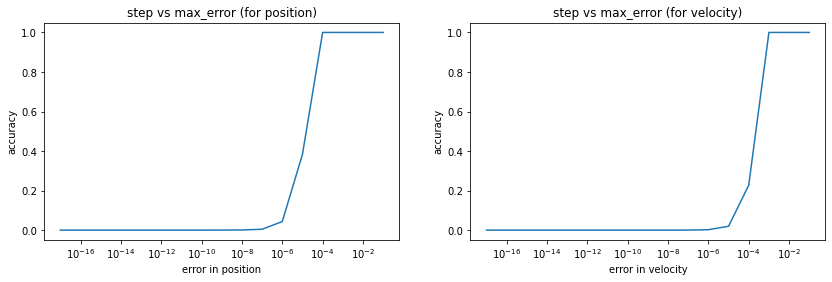

dt = 2.0000010000000002e-05, number of steps = 49999.97500001249


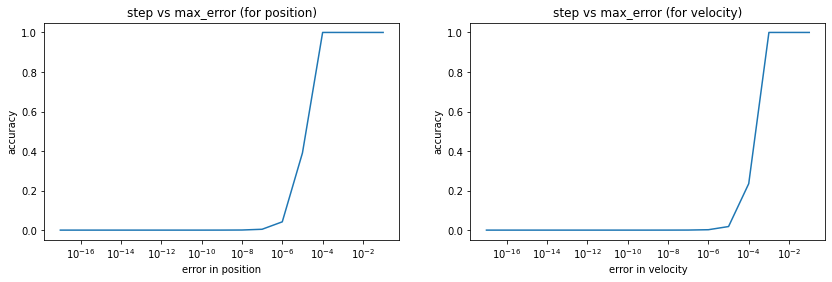

dt = 2.0000100000000002e-05, number of steps = 49999.75000124999


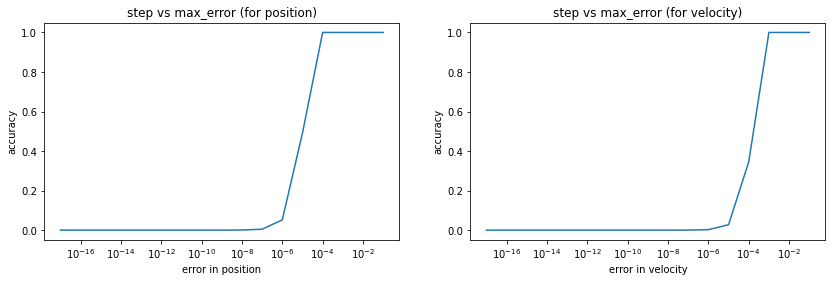

dt = 2.0001e-05, number of steps = 49997.50012499375


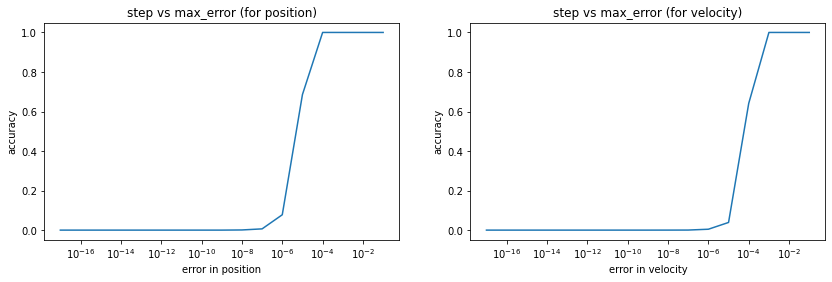

dt = 2.0010000000000003e-05, number of steps = 49975.012493753115


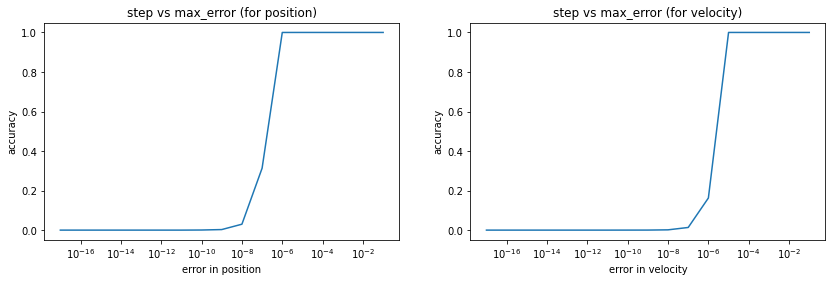

dt = 2.01e-05, number of steps = 49751.24378109453


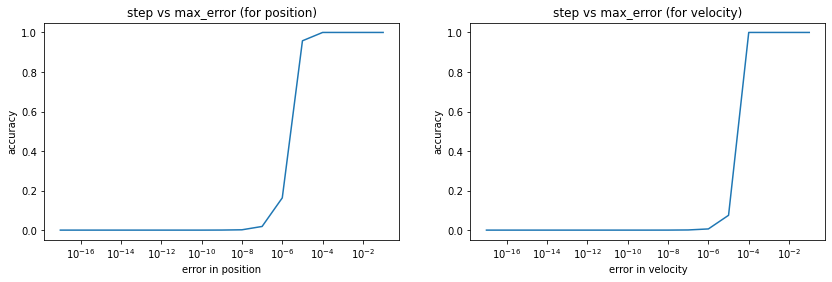

dt = 1.9900000000000003e-05, number of steps = 50251.256281407026


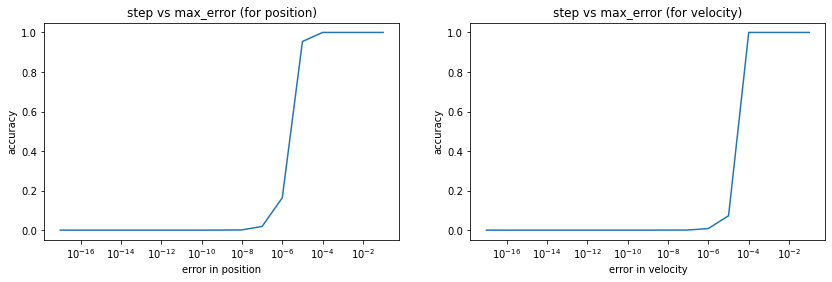

dt = 1.999e-05, number of steps = 50025.01250625313


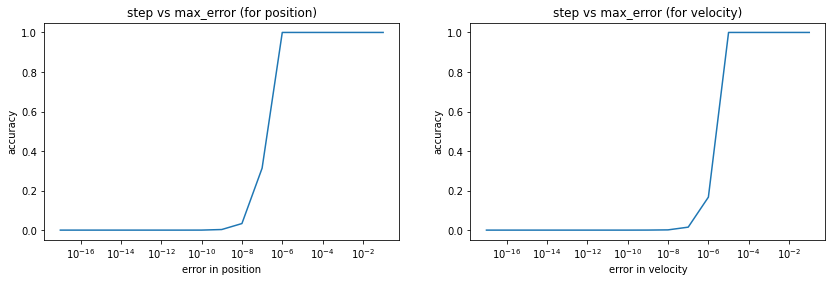

dt = 1.9999000000000003e-05, number of steps = 50002.50012500624


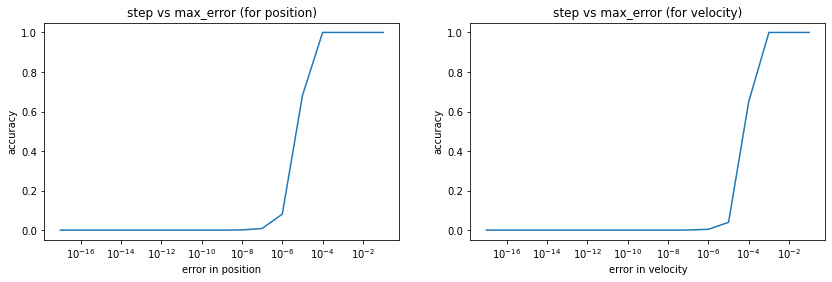

dt = 1.99999e-05, number of steps = 50000.25000125


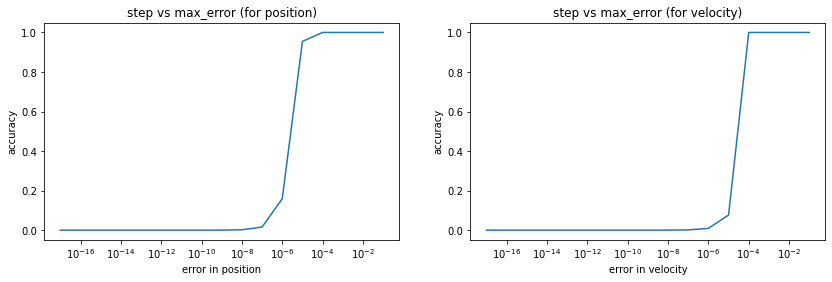

dt = 1.999999e-05, number of steps = 50000.025000012494


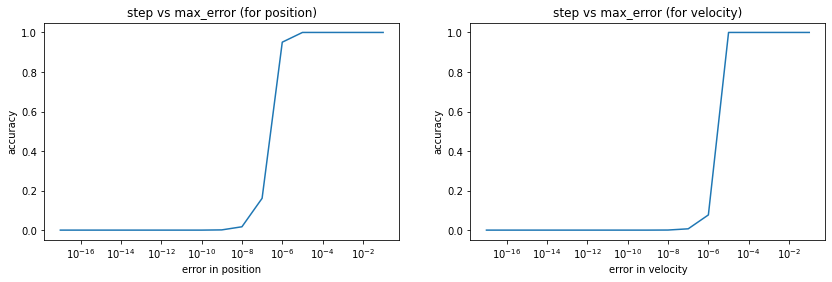

dt = 1.9999999000000002e-05, number of steps = 50000.00250000012


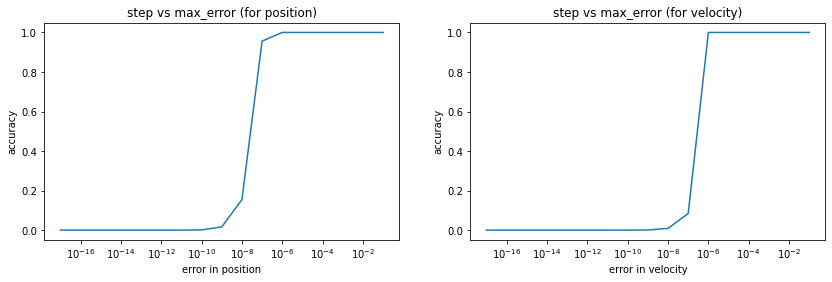

In [488]:
for x in dataArray:
    _dt = x[0]
    _errror_array = np.asarray(x[1])
    print(f"dt = {_dt}, number of steps = {1/_dt}")
    
    fig, ax = plt.subplots(1, 2, figsize=(14,4))
    ax[0].set_title("step vs max_error (for position)")
    ax[0].set_xscale("log")
    ax[0].set_xlabel("error in position")
    ax[0].set_ylabel("accuracy")
    ax[0].plot(_errror_array[:, 0], _errror_array[:, 1])

    ax[1].set_title("step vs max_error (for velocity)")
    ax[1].set_xscale("log")
    ax[1].set_xlabel("error in velocity")
    ax[1].set_ylabel("accuracy")

    ax[1].plot(_errror_array[:, 0], _errror_array[:, 2])
    plt.show()

In [473]:
def createErrorPrecisionList(total_dt_list):
    array = []
    for _dt in total_dt_list:
        data = np.load(f"bit_flip_np_data/x_position_with_dt_{_dt}_(no_dapming_no_noise).npy")
        initial_x = data[0]
        final_x = data[1]
        error_of_x_v_array = np.abs(initial_x[:, ...] + final_x[:, ...])
        max_error_x = np.max(error_of_x_v_array[:, :, 0])
        max_error_v = np.max(error_of_x_v_array[:, :, 1])
        array.append([_dt, max_error_x, max_error_v])
    return np.array(array)

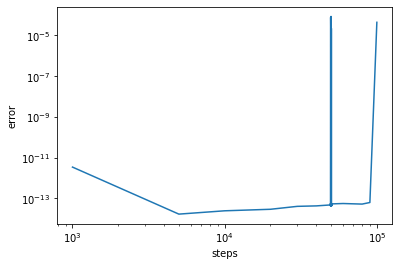

In [483]:
total_dt_list = np.flip(np.sort(dt_list))
error_with_dt = createErrorPrecisionList(total_dt_list)
plt.xlabel("steps")
plt.ylabel("error")
plt.yscale("log")
plt.xscale("log")
plt.plot(1/error_with_dt[:, 0], error_with_dt[:, 1])

# (a2) energy test

In [311]:
def createEnergyPrecisionList(_dt):
    data = np.load(f"x_position_with_dt_{_dt}_(no_dapming_no_noise).npy")
    initial_state = data[0]
    final_state = data[1]
    
    initial_v = initial_state[:, :, 1]
    final_v = final_state[:, :, 1]
    
    initial_KE = 1/2 * initial_v**2
    final_KE   = 1/2 * final_v**2
    initial_PE = bfr.system.get_potential(initial_state, 0).reshape(-1, 1)
    final_PE   = bfr.system.get_potential(final_state, 0).reshape(-1, 1)
        
    inital_TE = initial_KE + initial_PE
    final_TE = final_KE + final_PE
    
    return final_TE - inital_TE



In [312]:
"check all states, gaussian  distribution for ∆E of all the particles"

for _dt in dt_list:
    energy_difference = createEnergyPrecisionList(_dt)
    print("step: ", 1/_dt, max(energy_difference))

step:  1000.0 [-1.56125113e-17]
step:  5000.0 [1.90070182e-13]
step:  10000.0 [3.53495011e-13]
step:  20000.0 [4.8316906e-13]
step:  30000.0 [6.37712105e-13]
step:  40000.0 [5.57776048e-13]
step:  49999.99999999999 [6.09290396e-13]
step:  60000.0 [7.15871806e-13]
step:  80000.0 [7.90478794e-13]
step:  90000.0 [8.79296636e-13]
step:  99999.99999999999 [9.85878046e-13]


## (b) fidelity assessment

In [313]:
def createFidelityList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}_(no_dapming_no_noise).npy")
    initial_x_bit = np.sign(data[0][:, :, 0])
    final_x_bit = np.sign(data[1][:, :, 0])
    
    total_number_of_bit = len(initial_x_bit)
    bad_bits = np.sum(initial_x_bit == final_x_bit)
    good_bits = np.sum(initial_x_bit != final_x_bit)
    
    return (_dt, good_bits / total_number_of_bit)

fidelityDataArray = [createFidelityList(_dt) for _dt in dt_list]

In [314]:
fidelityDataArray

[(0.001, 1.0),
 (0.0002, 1.0),
 (0.0001, 1.0),
 (5e-05, 1.0),
 (3.3333333333333335e-05, 1.0),
 (2.5e-05, 1.0),
 (2e-05, 1.0),
 (1.6666666666666667e-05, 1.0),
 (1.25e-05, 1.0),
 (1.1111111111111112e-05, 1.0),
 (1e-05, 1.0)]

## (c) work done information

In [348]:
def createWorkDoneList(_dt):
    work_done = np.load(f"work_done_with_dt_{_dt}_(no_dapming_no_noise).npy")
    N = len(work_done)
    mean_work_done = np.mean(work_done)
    fluctuation = mean_work_done / np.sqrt(N)
    jarzynski_term = np.sum(np.exp(-work_done))/N
    return (_dt, mean_work_done, fluctuation, jarzynski_term)

In [349]:
# 0: dt, 1L mean_work_done, 2: fluctuation, 3: jarzynski_term)
workDoneDataArray = np.asarray([createWorkDoneList(_dt) for _dt in dt_list])
print(workDoneDataArray)

[[ 2.04081633e-05 -2.44965510e-16 -2.44965510e-18  1.00000000e+00]
 [ 2.03665988e-05  1.31556240e-15  1.31556240e-17  1.00000000e+00]
 [ 2.03252033e-05 -6.66405097e-18 -6.66405097e-20  1.00000000e+00]
 [ 2.02839757e-05  6.48171795e-16  6.48171795e-18  1.00000000e+00]
 [ 2.02429150e-05  2.27043299e-15  2.27043299e-17  1.00000000e+00]
 [ 2.02020202e-05 -8.40919842e-16 -8.40919842e-18  1.00000000e+00]
 [ 2.01612903e-05  3.73675286e-16  3.73675286e-18  1.00000000e+00]
 [ 2.01207243e-05 -2.58242203e-06 -2.58242203e-08  1.00000260e+00]
 [ 2.00803213e-05 -2.37238434e-16 -2.37238434e-18  1.00000000e+00]
 [ 2.00400802e-05 -2.00731626e-16 -2.00731626e-18  1.00000000e+00]
 [ 2.00000000e-05  1.09855949e-07  1.09855949e-09  9.99999904e-01]
 [ 1.99600798e-05  1.03936448e-15  1.03936448e-17  1.00000000e+00]
 [ 1.99203187e-05 -4.99047611e-16 -4.99047611e-18  1.00000000e+00]
 [ 1.98807157e-05 -6.38269578e-16 -6.38269578e-18  1.00000000e+00]
 [ 1.98412698e-05  1.75839261e-15  1.75839261e-17  1.00000000e

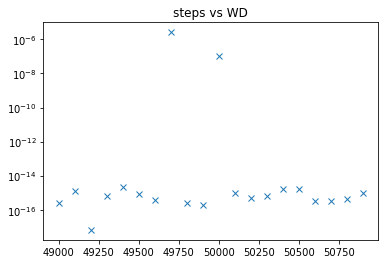

In [350]:
plt.title("steps vs WD")
plt.yscale("log")
plt.plot(1/workDoneDataArray[:, 0], np.abs(workDoneDataArray[:, 1]), "x")

## (d) Check EPT

In [6]:
bfr.sim.initial_state

array([[[-0.44088838,  1.04191893]],

       [[ 0.62480677,  0.57828637]],

       [[ 1.18852182, -0.41925903]],

       ...,

       [[-0.12577223, -0.88457455]],

       [[-0.90690916, -1.17682555]],

       [[ 0.96165472,  0.05535607]]])

In [9]:
import numpy as np

In [17]:
E = bfr.sim.system.get_potential(initial_state, 0)

In [20]:
np.exp(-E)

array([0.38318418, 0.14566215, 0.00093888, ..., 0.92490715, 0.01726978,
       0.01042441])

In [25]:
get_force = bfr.sim.system.get_external_force
initial_state = bfr.sim.initial_state
E = bfr.sim.system.get_potential(initial_state, 0)
F = get_force(initial_state, 0)
state = initial_state[...,0]
np.mean(np.exp(-E) * np.multiply(state, -F))

1.4845388180217949

In [24]:
np.multiply(state, -F)

array([[  1.91847904,  -2.71878041,  -5.17172663, ...,   0.5472845 ,
          3.94631903,  -4.18453852],
       [ -2.71878041,   3.85293076,   7.32913353, ...,  -0.77558647,
         -5.59254213,   5.93013586],
       [ -5.17172663,   7.32913353,  13.94164638, ...,  -1.47533842,
        -10.63826229,  11.28044084],
       ...,
       [  0.5472845 ,  -0.77558647,  -1.47533842, ...,   0.15612385,
          1.1257664 ,  -1.19372327],
       [  3.94631903,  -5.59254213, -10.63826229, ...,   1.1257664 ,
          8.11759396,  -8.60761241],
       [ -4.18453852,   5.93013586,  11.28044084, ...,  -1.19372327,
         -8.60761241,   9.12721081]])

In [13]:
np.multiply(state, -F)

array([[ 1.91847904],
       [ 3.85293076],
       [13.94164638],
       ...,
       [ 0.15612385],
       [ 8.11759396],
       [ 9.12721081]])

# dt_sweep

In [8]:
sweepObject = {
    "lambda":   0,
    "N":        10_000,
    "dt":       [1/1_000, 1/5_000, 1/10_000, 1/50_000, 1/100_000],
#     "dt":       [1/500_000, 1/1_000_000],
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": 1
}

parameter = "dt"
label = "dt_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/5) ==========
lambda_0_N_10000_dt_0.001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10129 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = -9.866311415130875e-14
========== finished (1/5) ==========
========== start (2/5) ==========
lambda_0_N_10000_dt_0.0002_k_9.8696_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10037 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = -4.461179457279859e-16
========== finished (2/5) ==========
========== start (3/5) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1

 initializing...
the par

dt_sweep
parameters:  [0.001, 0.0002, 0.0001, 2e-05, 1e-05]
fidelity:  [100.0, 100.0, 100.0, 100.0, 100.0]
meanFinalWork:  [-9.866311415130875e-14, -4.461179457279859e-16, 5.691076337994977e-16, 6.519444854331414e-07, 3.6017400427308813e-07]


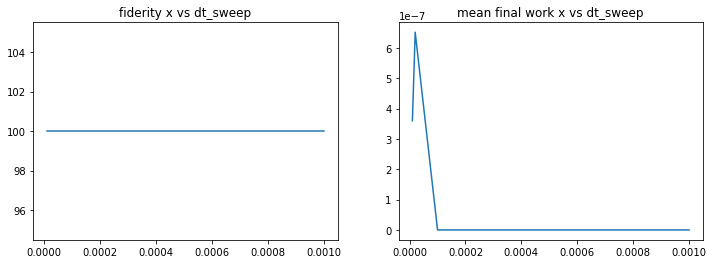

In [72]:

parameter = "dt"
label = "dt_sweep"
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)



# k_sweep

In [128]:
%%notify
for k in np.linspace(1, 10, 9):
    sweepObject = {
        "lambda":   0,
        "N":        10_000,
        "dt":       1/50_000,
        "k":        [k],
        "tau":      np.pi/np.sqrt(k),
        "depth":    1,
        "location": 1

    }
    
    parameter = "k"
    label = "k_sweep"
    heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/1) ==========
lambda_0_N_10000_dt_2e-05_k_1_tau_3.1416_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (1.0, 1.0)]
 found 10129 samples out of 10000
 running sim...

 analyzing output...


NameError: name 'bfr' is not defined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

k_sweep
parameters:  []
fidelity:  []
meanFinalWork:  []


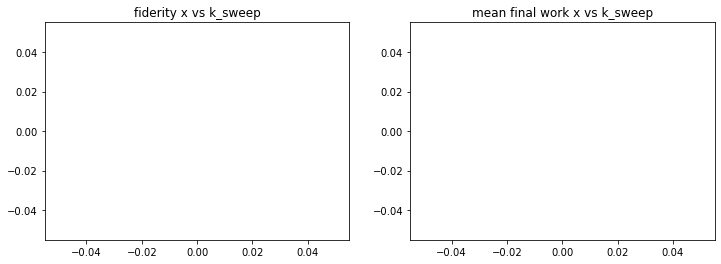

In [86]:
%notify
parameter = "k"
label = "k_sweep"
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)


In [32]:
import notifypy
notification = notifypy.Notify()
notification.title = "Cool Title"
notification.message = "Even cooler message."
notification.send()

True

# tau_sweep

In [72]:
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      np.linspace(0.5, 5, 8),
    "depth":    1,
    "location": 1
}

# how long the protocol, relation between tau and k

parameter = "tau"
label = "tau_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_0.5_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10015 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.6101772705455206
========== finished (1/8) ==========
========== start (2/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1.1429_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10054 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.591708286806516
========== finished (2/8) ==========
========== start (3/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1.7857_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.

k_sweep
parameters:  [9.869604401089358, 20.972909352314886, 32.07621430354041, 43.17951925476594, 54.28282420599147, 65.386129157217, 76.48943410844252, 87.59273905966805, 98.69604401089359]
fidelity:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
meanFinalWork:  [-1.2395067135266164e-16, -2.051701644454561e-06, 5.5382978443963306e-08, 2.4651673115065058e-05, 7.254058308333744e-07, 1.6350870259827497e-06, 5.181511533852925e-06, -6.144556631049099e-06, 4.324640381588687e-05]


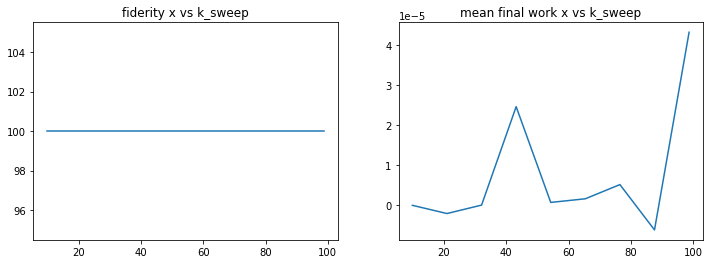

In [37]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)

# depth sweep

In [65]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

sweepObject = {
    "lambda":   0,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    np.linspace(1, 4, 9),
    "location": 1
}

label = "depth_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10164 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 5.954147909103765e-17
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1.375_location_1

 initializing...
the parameters:  [(1.375, 1.375), (-5.5, -5.5)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10004 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = -7.081716263736584e-16
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1.75_location_1

 initializing

depth_sweep
parameters:  [1.0, 1.375, 1.75, 2.125, 2.5, 2.875, 3.25, 3.625, 4.0]
fidelity:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
meanFinalWork:  [5.954147909103765e-17, -7.081716263736584e-16, 6.784473523755609e-17, -3.845428162103375e-17, 2.82743815509343e-16, 1.0070722078118045e-17, -6.1476109965863e-17, 5.028688376080767e-17, -1.522775795162381e-16]


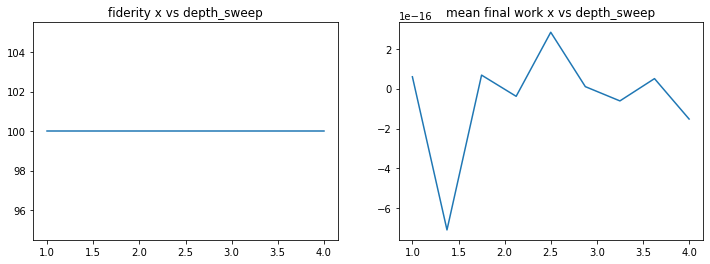

In [67]:
parameter = "depth"
label = "depth_sweep"

heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)

# location sweep

In [68]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

sweepObject = {
    "lambda":   0,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": np.linspace(1, 3, 9)
    
}

parameter = "location"
label = "location_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10001 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 9.979158590496211e-17
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1.25

 initializing...
the parameters:  [(0.4096, 0.4096), (-2.56, -2.56)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10087 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = -4.899235494644347e-16
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1.5

 initializi

location_sweep
parameters:  [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
fidelity:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
meanFinalWork:  [9.979158590496211e-17, -4.899235494644347e-16, 1.2290066568961388e-15, -9.085716264957737e-17, -4.731245411023882e-16, 1.140426331434866e-15, -3.141601930741029e-16, -9.073369136993692e-16, 4.595446272601697e-16]


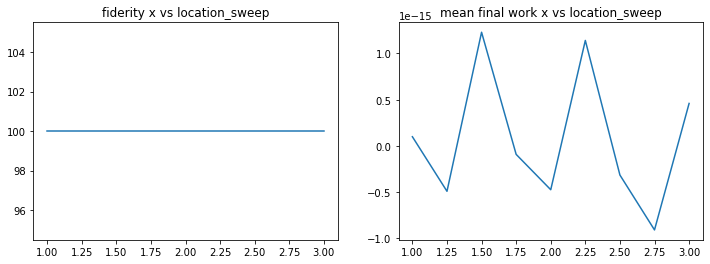

In [69]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)

In [660]:
%%time
bfr.run_sim(verbose=True)


 initializing...
 found 5001 samples out of 5000
 running sim...

 analyzing output...
CPU times: user 549 ms, sys: 68.4 ms, total: 617 ms
Wall time: 708 ms


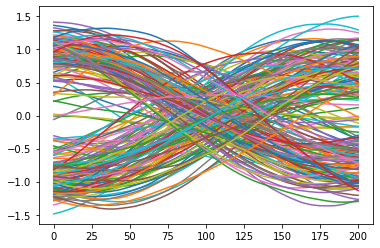

In [662]:
#here is a quick trajectory trace
allstate = bfr.sim.output.all_state['states']
plt.plot(allstate[:,:,0,0].transpose());

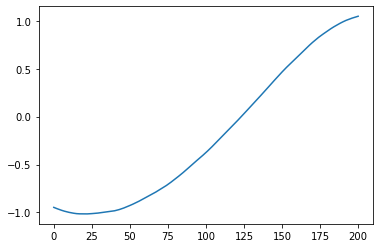

In [670]:
plt.plot(allstate[0,:,0,0]);

In [ ]:
def setup_sim(system, init_state, procedures=None, sim_params=None, dt=1/200, damping=1, temp=1, extra_time=1):
    print(f" system: {system},\n init_state: {init_state},\n procedures: {procedures},\n " +
          f"sim_params: {sim_params},\n dt: {dt},\n damping: {damping},\n" +
          f" temp: {temp},\n extra_time: {extra_time}")
    
sim_kwargs = {'damping': "damping",
          'temp': "T", 
          'dt':"dt", 
          'procedures':"proceudures",
          'sim_params': [1, 1, 0]
         }

setup_sim("system", "init_state", **sim_kwargs)

In [366]:

# Generate some random data
data = np.random.normal(loc=0, scale=1, size=1000)

# Compute the histogram
hist, bins = np.histogram(data, bins=20, density=False)


In [369]:
sum(hist)

1000